# **Colab Notebook for Augmentation**

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
import albumentations as A
import torchvision
import torch
import os
import torchvision.transforms as transforms
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
np.random.seed(1) #to have reproducible results 
pd.set_option('display.max_colwidth', None)

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


From Drive, Add all images as paths. Use different paths for different extension of images in your folder.

In [8]:
paths1 = glob.glob('/gdrive/My Drive/Sri Lanka Flags/Training Set/*.jpg',recursive=True)
paths2 = glob.glob('/gdrive/My Drive/trainer_model/val/*.png',recursive=True)
paths3 = glob.glob('/gdrive/My Drive/trainer_model/val/*.PNG',recursive=True)
paths = paths1 + paths2 + paths3
len(paths)

40

In [9]:
# img to array
origin = [np.asarray(Image.open(img)) for img in paths]
# origin

In [10]:
orig = np.array([np.asarray(Image.open(img)) for img in paths])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [13]:
from PIL import Image, ImageFilter
original = [Image.open(img) for img in paths]
req = [img.convert('RGB') for img in original]
blurred_image = [img.filter(ImageFilter.GaussianBlur(radius=5)) for img in req]

In [19]:
# f_orig = np.array([np.asarray(Image.open(img)) for img in req])
from numpy import asarray
data = [asarray(img) for img in req]

# **Resize Images**

In [20]:
# resized_image = [cv2.resize(img,(650,750)) for img in orig]
resized_image = [cv2.resize(img,(650,750)) for img in data]

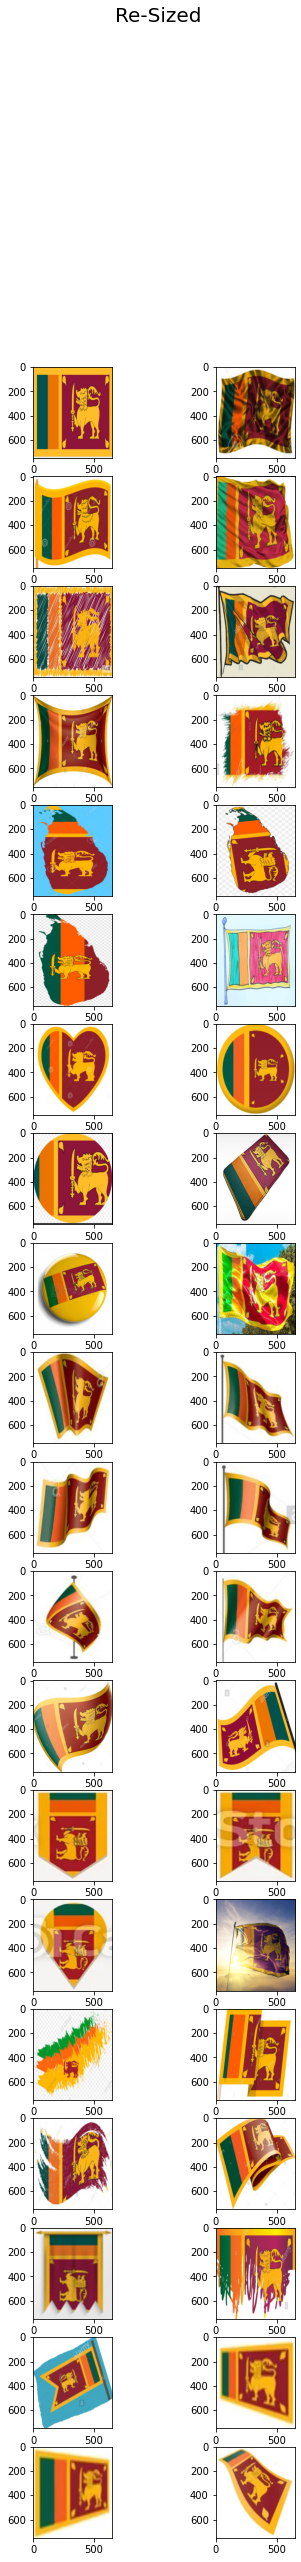

In [21]:
plt.figure(figsize=(6,50))
i = 0
for img in resized_image[0:50]:
    plt.subplot(25, 2, i+1)
    # plt.xticks([])
    # plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Re-Sized", fontsize=20)
plt.show()

# **Contrast of the reized images**

In [22]:
# contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img)).enhance(np.random.choice(np.linspace(10, 20, 5)))) for img in resized_image]

In [23]:
contrast_1 = [np.asarray(ImageEnhance.Contrast(img).enhance(np.random.choice(np.linspace(1.5, 2, 5)))) for img in req]

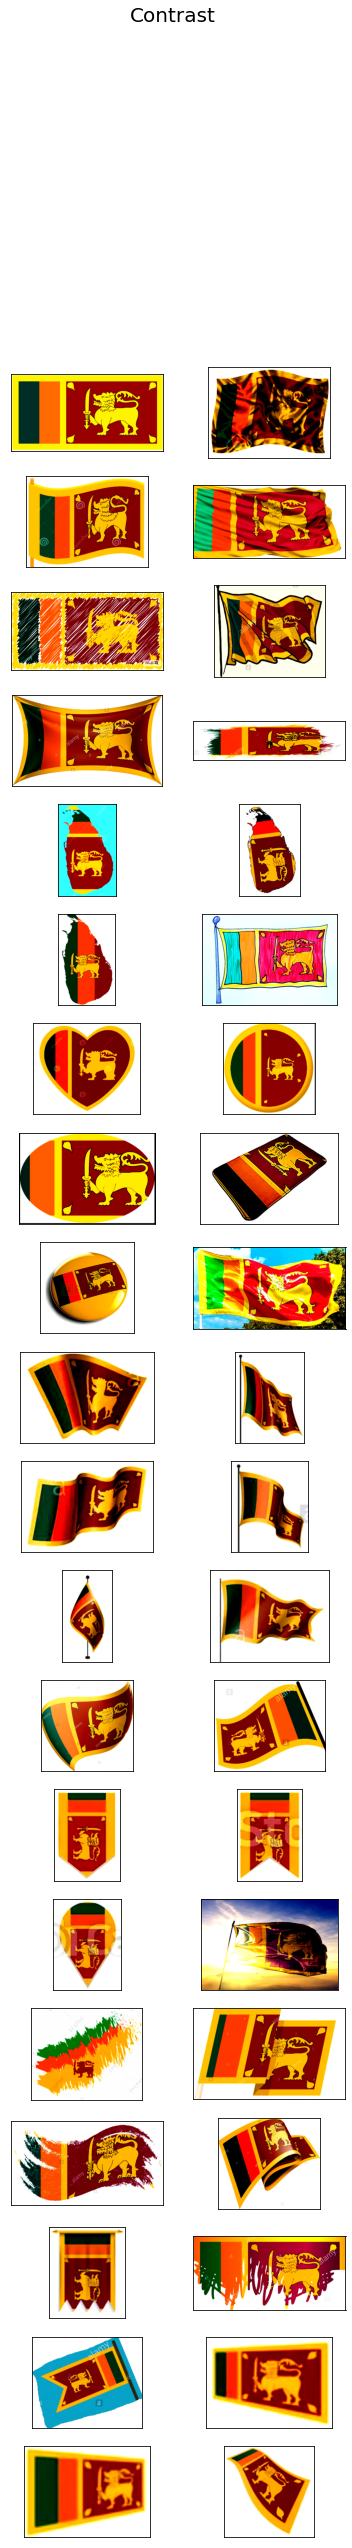

In [24]:
plt.figure(figsize=(6,50))
i = 0
for img in contrast_1[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Contrast", fontsize=20)
plt.show()


# **Rotated Images**

In [25]:
rotate = [Image.fromarray(img).rotate(np.random.choice([45])) for img in resized_image]

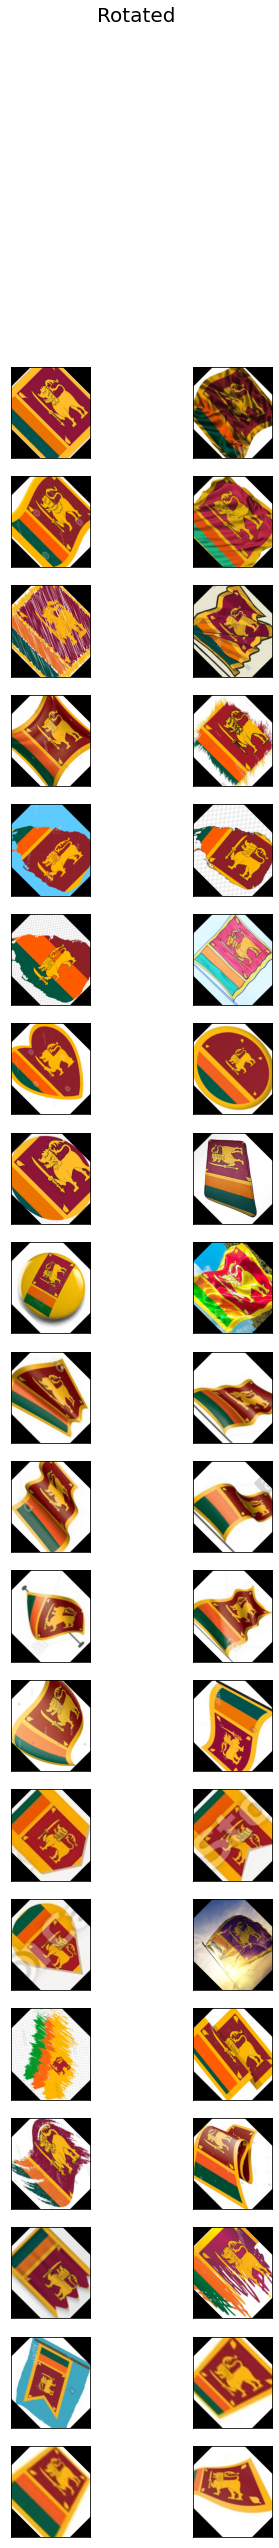

In [26]:
plt.figure(figsize=(6,50))
i = 0
for img in rotate[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Rotated", fontsize=20)
plt.show()

# **Inverted images**

In [27]:
random_rotate = [Image.fromarray(img).rotate(np.random.choice([30, 39, 60, 69, 120, 155, 170, 220, 310, 339])) for img in resized_image]

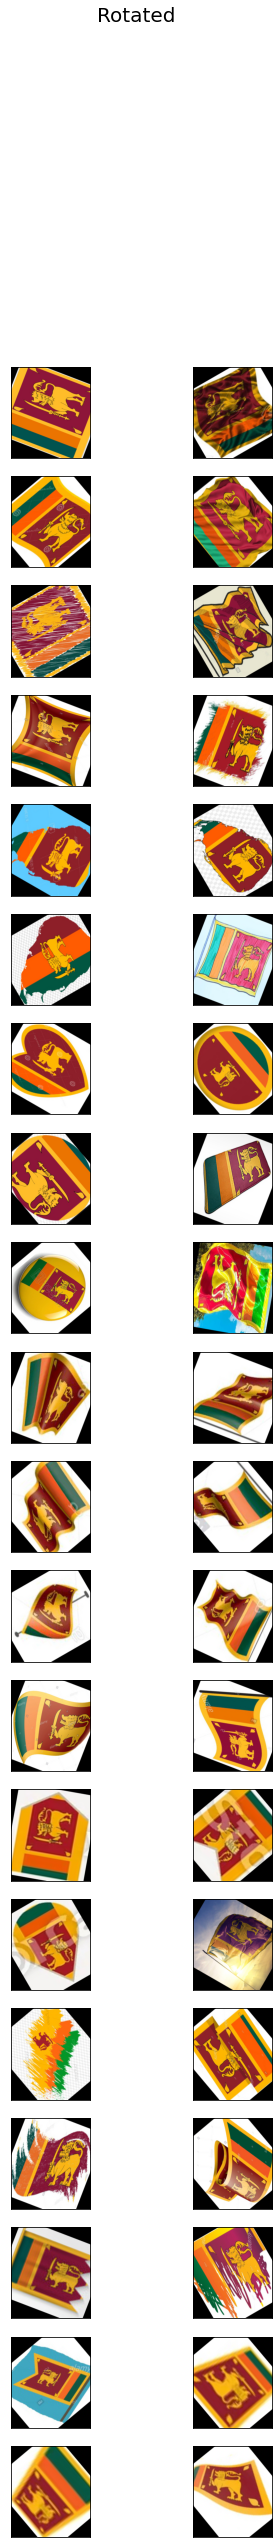

In [28]:
plt.figure(figsize=(6,50))
i = 0
for img in random_rotate[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Rotated", fontsize=20)
plt.show()

# **Increasing Brightness**

In [29]:
color = [np.asarray(ImageEnhance.Brightness(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1.5, 1.6, 2)))) for img in resized_image]

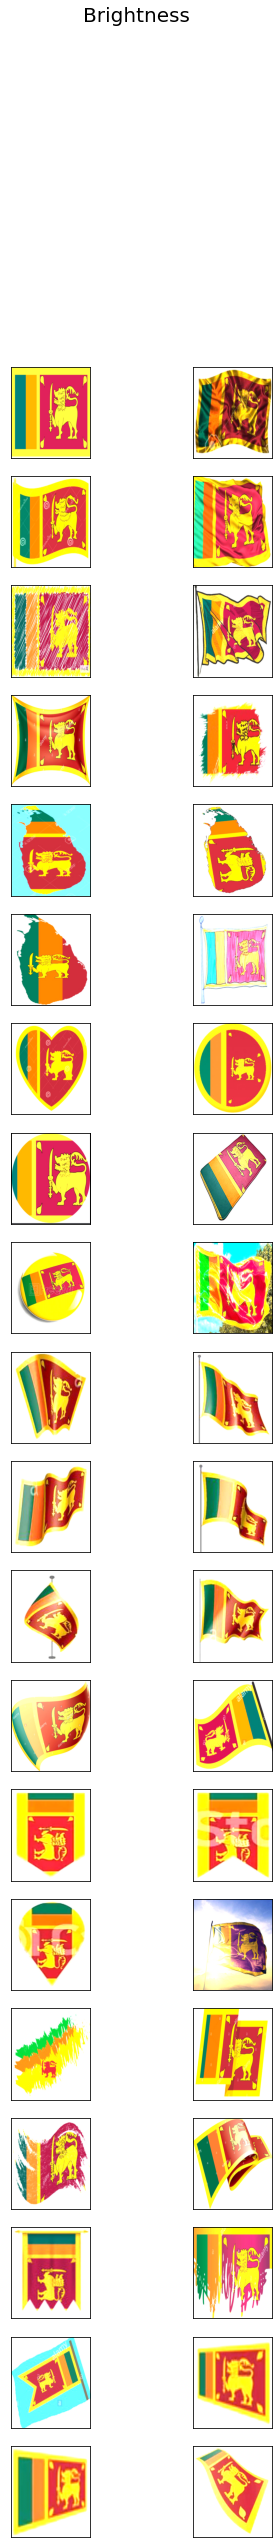

In [30]:
plt.figure(figsize=(6,50))
i = 0
for img in color[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Brightness", fontsize=20)
plt.show()

# **BLUR**

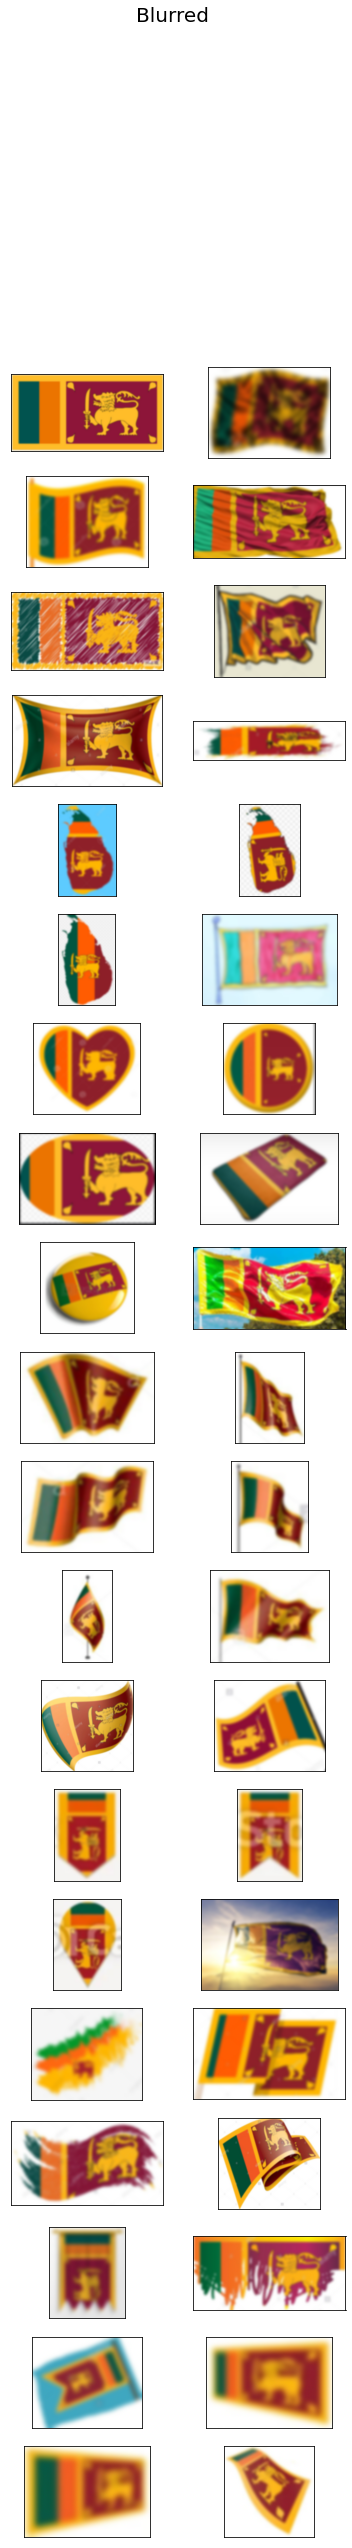

In [14]:
plt.figure(figsize=(6,50))
i = 0
for img in blurred_image[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Blurred", fontsize=20)
plt.show()

# **Flipping Images left-right & top-bottom**

In [15]:
# color = [np.asarray(ImageFilter.BoxBlur(5)(Image.fromarray(img)).enhance(np.random.choice(np.linspace(1.5, 1.6, 2)))) for img in orig]
req = [img.convert('RGB') for img in original]
flippedlr_image = [img.transpose(Image.FLIP_LEFT_RIGHT) for img in req]
flipped = [img.transpose(Image.FLIP_TOP_BOTTOM) for img in req]
flippedtb_image = [img.transpose(Image.FLIP_TOP_BOTTOM) for img in flippedlr_image]

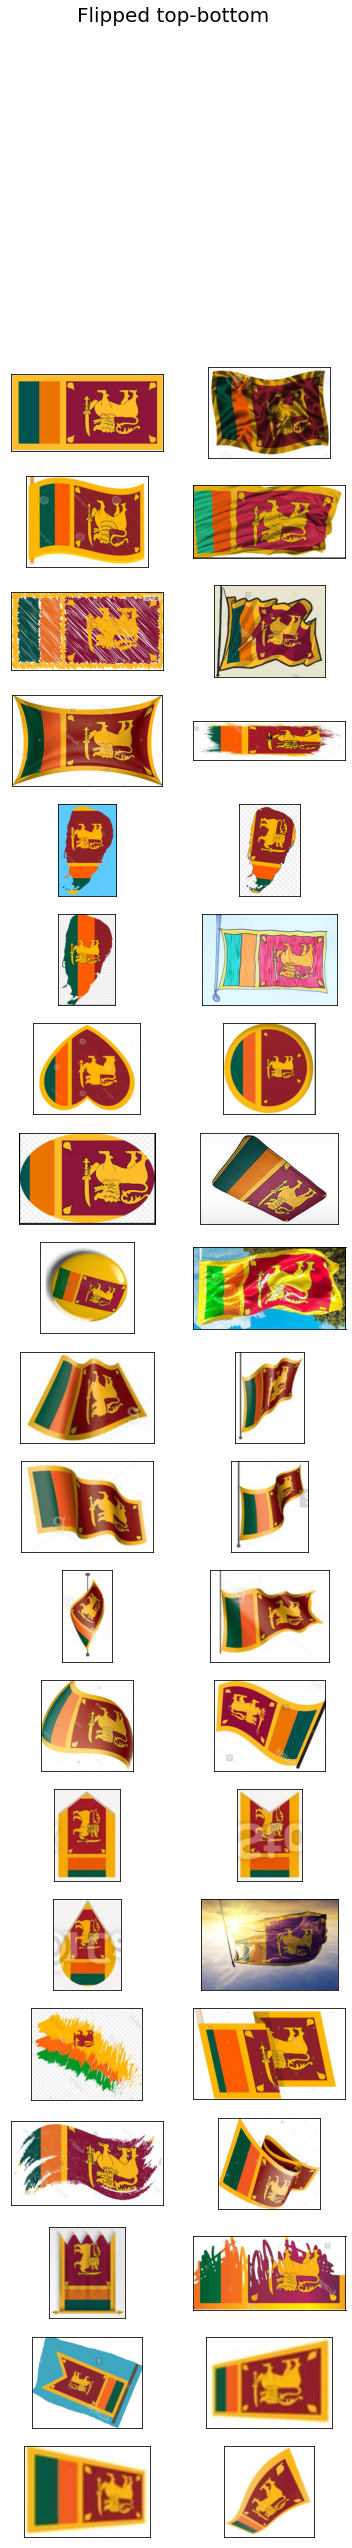

In [16]:
plt.figure(figsize=(6,50))
i = 0
for img in flipped[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Flipped top-bottom", fontsize=20)
plt.show()

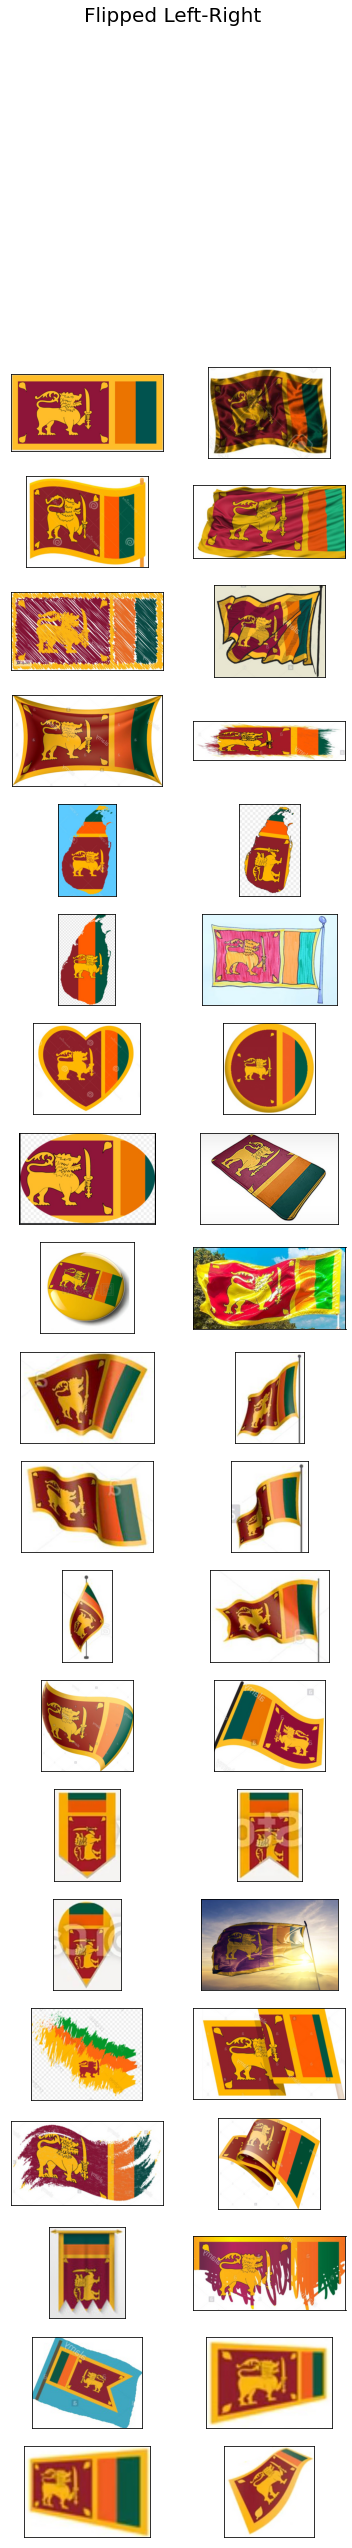

In [17]:
plt.figure(figsize=(6,50))
i = 0
for img in flippedlr_image[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Flipped Left-Right", fontsize=20)
plt.show()

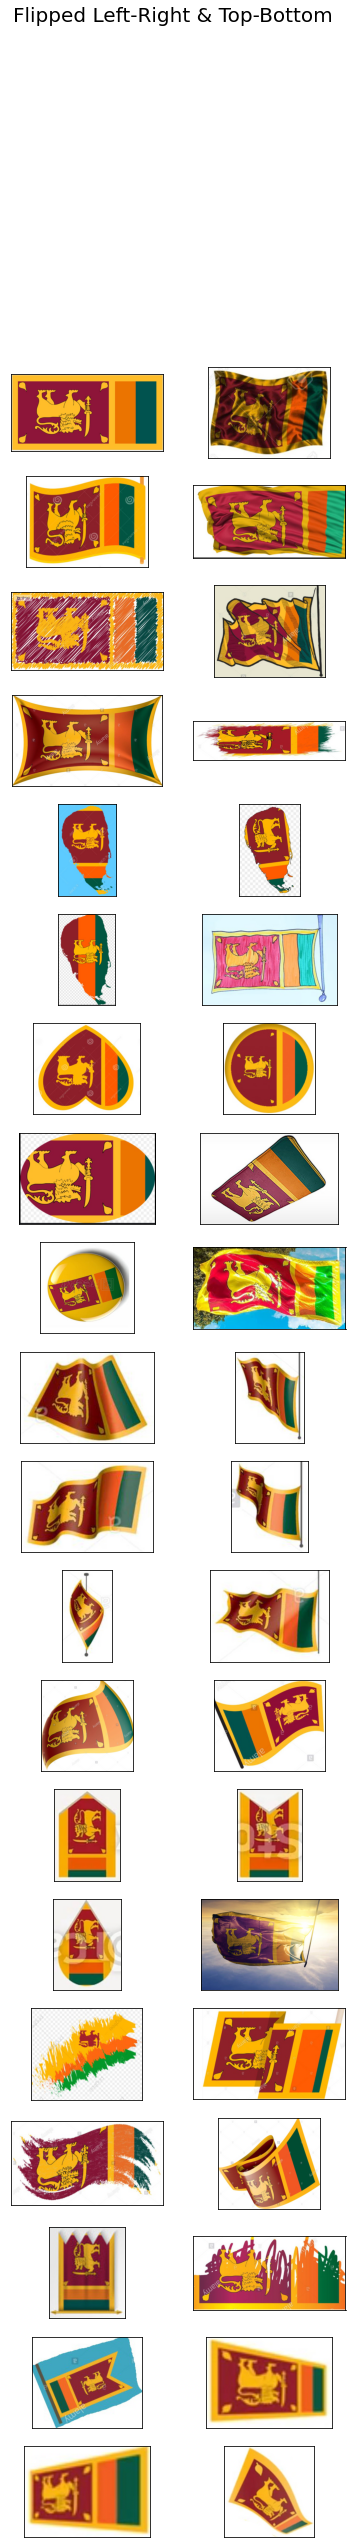

In [18]:
plt.figure(figsize=(6,50))
i = 0
for img in flippedtb_image[0:50]:
    plt.subplot(25, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Flipped Left-Right & Top-Bottom", fontsize=20)
plt.show()

# **Saving images back to any Folder in Drive**

In [31]:
!pip install --upgrade gupload

from pydrive.auth import GoogleAuth
from google.colab import auth

auth.authenticate_user()


     |████████████████████████████████| 81 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.288 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 1.7.10 which is incompatible.


In [32]:
import numpy as np
from PIL import Image as im

for img in rotate[0:50]:
  # data = im.fromarray(img)
  rgb_img = img.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg                            # change the path to your google drive folder path

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file

In [33]:
import numpy as np
from PIL import Image as im

for img in contrast_1[0:50]:
  data = im.fromarray(img)
  rgb_img = data.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  # data.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file

In [34]:
import numpy as np
from PIL import Image as im

for img in color[0:50]:
  data = im.fromarray(img)
  rgb_img = data.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  # img.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg 

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file

In [35]:
import numpy as np
from PIL import Image as im

for img in blurred_image[0:50]:
  # data = im.fromarray(img)
  rgb_img = img.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  # img.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg 

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file

In [36]:
import numpy as np
from PIL import Image as im

for img in flipped[0:50]:
  # data = im.fromarray(img)
  rgb_img = img.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  # img.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg 

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file

In [37]:
import numpy as np
from PIL import Image as im

for img in flippedlr_image[0:50]:
  # data = im.fromarray(img)
  rgb_img = img.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  # img.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg 

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file

In [38]:
import numpy as np
from PIL import Image as im

for img in flippedtb_image[0:50]:
  # data = im.fromarray(img)
  rgb_img = img.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  # img.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg 

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file

In [39]:
import numpy as np
from PIL import Image as im

for img in random_rotate[0:50]:
  # data = im.fromarray(img)
  rgb_img = img.convert('RGB')
  rgb_img.save('SriLanka.jpg')
  # img.save('SriLanka.jpg')
  !gupload --to '1WPH4vBwaTApZzqmEKVCuke3DXQK52PvW' SriLanka.jpg 

Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file: SriLanka.jpg
Uploading file